In [1]:
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite.git


Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 786, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 786 (delta 2), reused 3 (delta 0), pack-reused 780
Receiving objects: 100% (786/786), 197.64 MiB | 26.18 MiB/s, done.
Resolving deltas: 100% (372/372), done.


In [1]:
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd drive/"MyDrive/OCR/vehicle detection"

/content/drive/MyDrive/OCR/vehicle detection


In [4]:
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite.git


Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 786, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 786 (delta 2), reused 3 (delta 0), pack-reused 780
Receiving objects: 100% (786/786), 197.64 MiB | 13.88 MiB/s, done.
Resolving deltas: 100% (372/372), done.
Checking out files: 100% (126/126), done.


In [3]:
!ls

'car counting.ipynb'   tensorflow-yolov4-tflite


In [4]:
%cd "tensorflow-yolov4-tflite"

/content/drive/MyDrive/OCR/vehicle detection/tensorflow-yolov4-tflite


In [5]:
!python save_model.py --weights ./data/yolov4.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4 

2021-09-29 00:35:47.350201: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-29 00:35:47.350270: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aeee7b47b975): /proc/driver/nvidia/version does not exist
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (Batch

In [43]:
!python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --image "./data/highway1.jpg" --output "./data/result2.jpg" --score=0.25

2021-09-29 02:05:47.254922: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-29 02:05:47.254986: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aeee7b47b975): /proc/driver/nvidia/version does not exist
2021-09-29 02:06:02.241990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
coordinate x_min 452
coordinate x_min 221
coordinate x_min 78


In [42]:
!python detectvideo.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --output "./data/result.mp4" --output_format "XVID" --dis_cv2_window=True

2021-09-29 02:05:38.422825: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-29 02:05:38.422894: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aeee7b47b975): /proc/driver/nvidia/version does not exist
Video from:  ./data/road.mp4
Traceback (most recent call last):
  File "detectvideo.py", line 125, in <module>
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "detectvideo.py", line 49, in main
    saved_model_loaded = tf.saved_model.load(FLAGS.weights, tags=[tag_constants.SERVING])
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/saved_model/load.py", line 864, in load
    result = load_internal(export_dir, tags, options)["root"]
  File "/usr

In [24]:
from moviepy.editor import *


path="./data/result.mp4" 

clip=VideoFileClip(path)
clip.ipython_display(width=1028)


Output hidden; open in https://colab.research.google.com to view.

In [38]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



In [44]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("./data/vehicle") if isfile(join("./data/vehicle", f))]
print(onlyfiles)

['vehiclecrop0.png', 'vehiclecrop1.png', 'vehiclecrop2.png']


In [54]:
def ocr(files):

  for filename in files:
    image = cv2.imread(os.path.join('./data/vehicle', filename))
    #convert to threshold
    image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #perform threshold
    # image2 = cv2.threshold(image1,  0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    # #blur the image
    # image3 = cv2.medianBlur(image2, 9)
    # #resize the image
    # image4 = cv2.resize(image3, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)

    # text = pytesseract.image_to_string(image4, config='--psm 11 --oem 3')
    # # pytesseract.image_to_string(image, config='--psm 11 --oem 3')

    # print(text)


  

    plt.imshow(image1)
    plt.show()

    # h, w = image.shape[:2]
    # #convert to gray
    # #threshold
    # image = cv2.threshold(image, )
    # return text



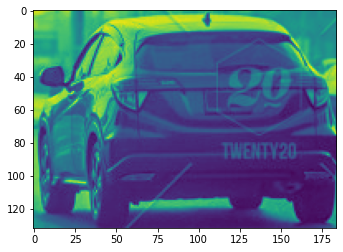

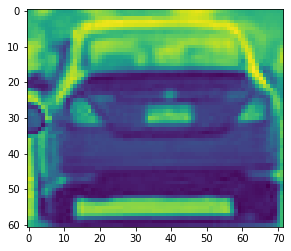

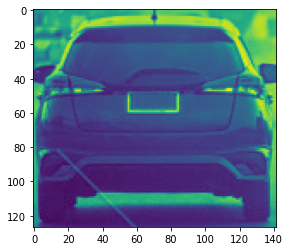

None


In [55]:
ocr1 = ocr(onlyfiles)
print(ocr1)